<a href="https://colab.research.google.com/github/FatmaBuseBorlu/YuzGoruntulerindenDuyguTanimaveTepkiVerme/blob/main/yapay_zeka1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive # Removed the unexpected indent here
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Drive'daki dosyaları listeleyelim
drive_dir = "/content/drive/MyDrive"
print("Drive'daki dosyalar:")
print(os.listdir(drive_dir))

Drive'daki dosyalar:
['Her şey', 'Fatma Buse - Ulusal Staj Programı Öğrenci Staj Kabulu Hk._99.pdf', 'Buse_staj_formu (1).pdf', 'fotiler.rar', 'Sertfikalar', 'Formasyon-Yüksek Lisans.gsheet', 'fatma buse borlu.jpg', 'Affective content analysis of music emotion through EEG.en.tr.pdf', 'TOWARDS MUSIC IMAGERY INFORMATION RETRIEVAL INTRODUCING THE OPENMIIR DATASET OF EEG RECORDINGS FROM MUS.pdf', '2024_View of the Examınatıon of famous use in television advertısements wıth electroencephalogram (EEG).pdf', 'openBCI', 'GÖNÜLLÜ ONAM FORMU.gform', 'Televizyon Reklamlarının Tüketicilerde Oluşturduğu Beyin Tepkilerinin Elektroensefalografi(EEG) ile Değerlendirilmesi (Yanıtlar).gsheet', 'Gönderilecek.png', 'Güncel Reklam Tablosu.gsheet', 'Televizyon Reklamlarının Tüketicilerde Oluşturduğu Beyin Tepkilerinin EEG ile Değerlendirilmesi Conference Paper.gdoc', 'Anılla yazın yaptığımız döküman.gdoc', 'Deneme Taslak Televizyon Reklamlarının Tüketicilerde Oluşturduğu Beyin Tepkile

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# Eğitim ve test veri yolları
train_dir = "/content/drive/MyDrive/Yapay Zeka Bilişsel Sİstemler Dersi Proje/RAF-DB-DATASET/DATASET/train"
test_dir = "/content/drive/MyDrive/Yapay Zeka Bilişsel Sİstemler Dersi Proje/RAF-DB-DATASET/DATASET/test"

In [ ]:
# Google Drive'ı bağlama
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Eğitim ve test verilerinin dağılımını inceleme
train_labels = []
test_labels = []

# Eğitim verilerini inceleme
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):
        train_labels.extend([label] * len(os.listdir(label_path)))

# Test verilerini inceleme
for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):
        test_labels.extend([label] * len(os.listdir(label_path)))

In [ ]:
# Eğitim ve test veri sınıf dağılımı
train_distribution = Counter(train_labels)
test_distribution = Counter(test_labels)

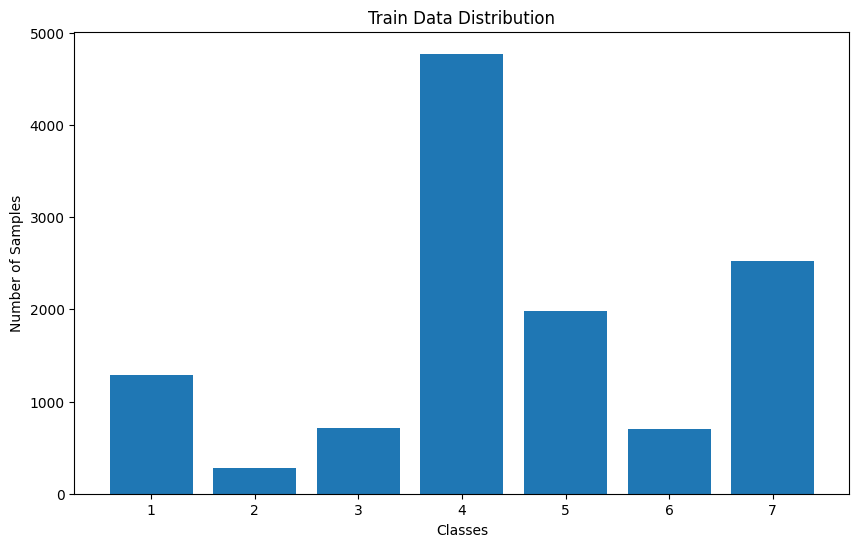

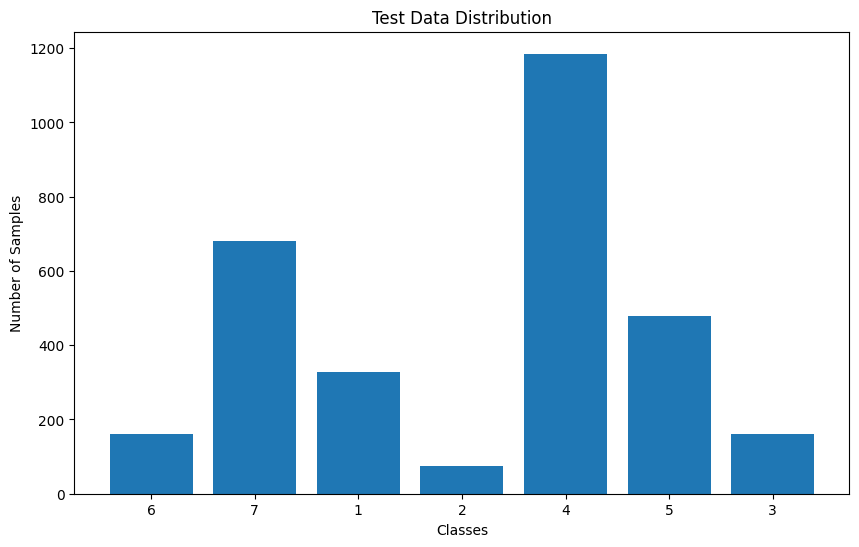

In [ ]:
# Sınıf dağılımını görselleştirme
def plot_distribution(distribution, title):
    plt.figure(figsize=(10, 6))
    plt.bar(distribution.keys(), distribution.values())
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Number of Samples")
    plt.show()

plot_distribution(train_distribution, "Train Data Distribution")
plot_distribution(test_distribution, "Test Data Distribution")

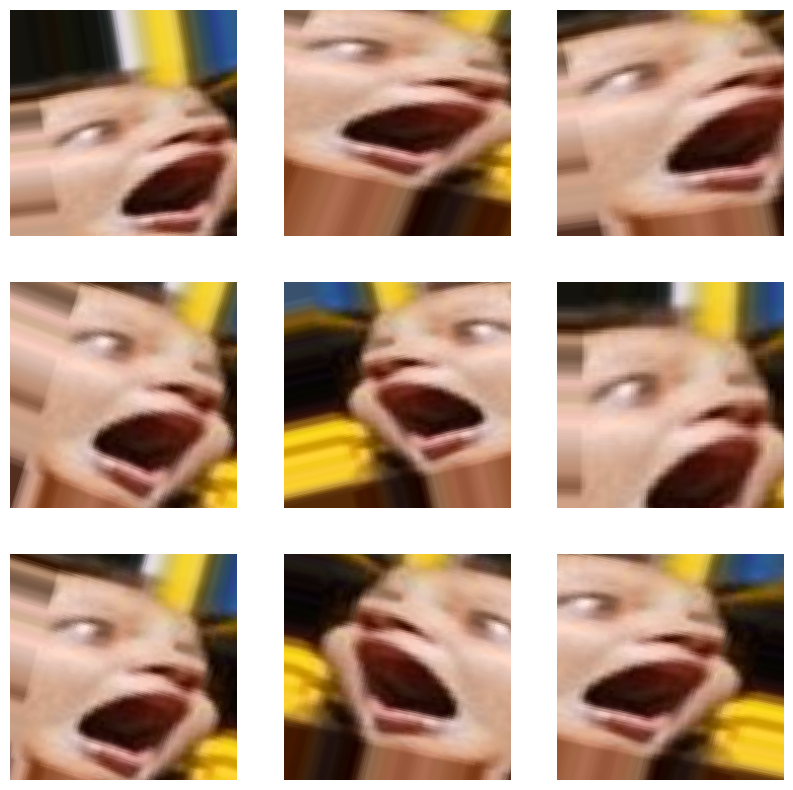

2 sınıfı için 100 artırılmış görüntü başarıyla oluşturuldu.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
import matplotlib.pyplot as plt

# Veri artırma işlemi için bir ImageDataGenerator oluşturma
data_augmentation = ImageDataGenerator(
    rotation_range=20,         # Görüntüyü döndürme (derece cinsinden)
    width_shift_range=0.2,     # Görüntüyü yatay kaydırma
    height_shift_range=0.2,    # Görüntüyü dikey kaydırma
    shear_range=0.2,           # Şeritleme (shearing)
    zoom_range=0.2,            # Yakınlaştırma
    horizontal_flip=True,      # Yatay çevirme
    fill_mode="nearest"        # Yeni pikseller için dolgu modu
)

# Eğitim veri setinden az örnekli sınıflardan birini artırma örneği
class_to_augment = "2"  # Az örnekli bir sınıf
augment_dir = os.path.join(train_dir, class_to_augment)

augmented_images = []
augmented_labels = []

for image_name in os.listdir(augment_dir):
    image_path = os.path.join(augment_dir, image_name)
    img = load_img(image_path, target_size=(224, 224))  # Görüntüyü yükle ve yeniden boyutlandır
    img_array = img_to_array(img)  # NumPy dizisine çevir
    img_array = np.expand_dims(img_array, axis=0)  # Veri artırma için batch formatına dönüştür

    # Veri artırma işlemi
    i = 0
    for batch in data_augmentation.flow(img_array, batch_size=1):
        augmented_images.append(batch[0])  # Artırılmış görüntüyü kaydet
        augmented_labels.append(int(class_to_augment))  # Sınıf etiketini kaydet
        i += 1
        if i >= 100:  # Her görüntü için 100 artırma oluştur
            break

# Yeni artırılmış veriyi görselleştirme
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].astype("uint8"))
    plt.axis("off")
plt.show()

print(f"{class_to_augment} sınıfı için 100 artırılmış görüntü başarıyla oluşturuldu.")


In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Google Drive'da ana klasör yolu
train_dir = "/content/drive/MyDrive/Yapay Zeka Bilişsel Sİstemler Dersi Proje/RAF-DB-DATASET/DATASET/train"
test_dir = "/content/drive/MyDrive/Yapay Zeka Bilişsel Sİstemler Dersi Proje/RAF-DB-DATASET/DATASET/test"

# Eğitim ve test verilerini depolamak için boş listeler
X_train, y_train = [], []
X_test, y_test = [], []

# Eğitim verilerini yükleme
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)  # Alt klasör yolu
    if os.path.isdir(label_path):  # Klasör olup olmadığını kontrol et
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            img = load_img(image_path, target_size=(224, 224))  # Görüntüyü yeniden boyutlandır
            img_array = img_to_array(img) / 255.0  # Normalizasyon
            X_train.append(img_array)
            y_train.append(int(label))  # Klasör adı etikettir

# Test verilerini yükleme
for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            img = load_img(image_path, target_size=(224, 224))
            img_array = img_to_array(img) / 255.0
            X_test.append(img_array)
            y_test.append(int(label))

# Numpy formatına dönüştürme
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Eğitim verileri: {X_train.shape}, Etiketler: {y_train.shape}")
print(f"Test verileri: {X_test.shape}, Etiketler: {y_test.shape}")


Eğitim verileri: (12271, 224, 224, 3), Etiketler: (12271,)
Test verileri: (3068, 224, 224, 3), Etiketler: (3068,)


In [ ]:
# Etiketleri 0'dan başlatma
y_train = y_train - 1
y_test = y_test - 1

print("0'dan Başlatılmış Eğitim Etiketleri (y_train):", np.unique(y_train))
print("0'dan Başlatılmış Test Etiketleri (y_test):", np.unique(y_test))


0'dan Başlatılmış Eğitim Etiketleri (y_train): [0 1 2 3 4 5 6]
0'dan Başlatılmış Test Etiketleri (y_test): [0 1 2 3 4 5 6]


In [ ]:
from tensorflow.keras.utils import to_categorical

# Sınıf sayısını yeniden kontrol et
num_classes = len(np.unique(y_train))

# Etiketleri kategorik hale getirme
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Kategorik Eğitim Etiketleri (y_train):", y_train.shape)
print("Kategorik Test Etiketleri (y_test):", y_test.shape)

Kategorik Eğitim Etiketleri (y_train): (12271, 7)
Kategorik Test Etiketleri (y_test): (3068, 7)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model oluşturma
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Overfitting'i azaltmak için Dropout kullanıyoruz
    Dense(7, activation='softmax')  # 7 duygu sınıfı için çıkış katmanı
])

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Eğitilen modeli kaydetme
model.save("emotion_recognition_model.h5")

Epoch 1/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 332s 860ms/step - accuracy: 0.4065 - loss: 1.6631 - val_accuracy: 0.5929 - val_loss: 1.1117
Epoch 2/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 310s 808ms/step - accuracy: 0.5802 - loss: 1.1622 - val_accuracy: 0.6613 - val_loss: 0.9509
Epoch 3/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 347s 904ms/step - accuracy: 0.6275 - loss: 1.0445 - val_accuracy: 0.6939 - val_loss: 0.8580
Epoch 4/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 312s 813ms/step - accuracy: 0.6776 - loss: 0.9110 - val_accuracy: 0.7070 - val_loss: 0.8358
Epoch 5/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 323s 842ms/step - accuracy: 0.6913 - loss: 0.8515 - val_accuracy: 0.7011 - val_loss: 0.8305
Epoch 6/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 329s 855ms/step - accuracy: 0.7198 - loss: 0.7641 - val_accuracy: 0.7327 - val_loss: 0.7766
Epoch 7/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 313s 814ms/step - accuracy: 0.7483 - loss: 0.6856 - val_accuracy: 0.7265 - val_loss: 0.8078
Epoch 8/10
384/384 ━━━━━━━━━━━━━━━━━━━━ 318s 828ms/step - accuracy: 0.7749 -

In [ ]:
# Modeli test etme
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Doğruluğu: {test_accuracy * 100:.2f}%")

96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.7283 - loss: 0.9424
Test Doğruluğu: 73.27%


Test edilecek görüntü: /content/drive/MyDrive/Yapay Zeka Bilişsel Sİstemler Dersi Proje/RAF-DB-DATASET/DATASET/test/7/test_2587_aligned.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


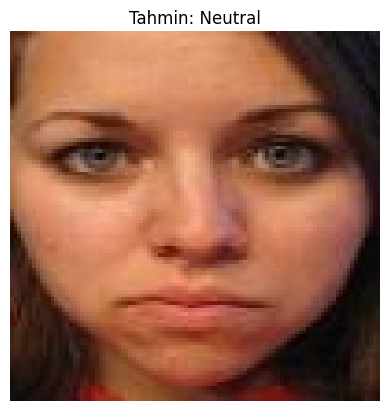

Modelin tahmini: Neutral


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# Modeli yükleme
model = load_model("emotion_recognition_model.h5")

# Test CSV dosyasını yükleme
test_csv_path = "/content/drive/MyDrive/Yapay Zeka Bilişsel Sİstemler Dersi Proje/RAF-DB-DATASET/test_labels.csv"
test_data = pd.read_csv(test_csv_path)

# Rastgele bir görüntü seçme
random_row = test_data.sample(n=1).iloc[0]
test_image_name = random_row['image']
correct_label = random_row['label']

# Görüntü yolunu oluşturma
test_image_path = os.path.join("/content/drive/MyDrive/Yapay Zeka Bilişsel Sİstemler Dersi Proje/RAF-DB-DATASET/DATASET/test", str(correct_label), test_image_name)
print(f"Test edilecek görüntü: {test_image_path}")

# Görüntüyü yükleme ve işleme
img = load_img(test_image_path, target_size=(224, 224))  # Görüntüyü yükle ve boyutlandır
img_array = img_to_array(img) / 255.0  # Normalizasyon
img_array = np.expand_dims(img_array, axis=0)  # Modelin tahmini için batch boyutuna dönüştür

# Görüntü üzerinde tahmin yapma
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Sınıf etiketleri
emotion_labels = {0: "Surprise", 1: "Fear", 2: "Disgust", 3: "Happy", 4: "Sad", 5: "Anger", 6: "Neutral"}
predicted_label = emotion_labels[predicted_class]

# Tahminin görselleştirilmesi
plt.imshow(load_img(test_image_path))  # Görüntüyü yükleyerek görselleştir
plt.title(f"Tahmin: {predicted_label}")
plt.axis("off")
plt.show()

print(f"Modelin tahmini: {predicted_label}")


In [ ]:
# Doğru etiketi test CSV'den kontrol edin
test_data = pd.read_csv('/content/drive/MyDrive/Yapay Zeka Bilişsel Sİstemler Dersi Proje/RAF-DB-DATASET/test_labels.csv')
correct_label = test_data[test_data['image'] == "test_0002_aligned.jpg"]['label'].values[0]

# Etiket ile tahmini karşılaştırma
correct_label_name = emotion_labels[correct_label - 1]  # Etiketler 1'den başladığı için
print(f"Doğru sınıf: {correct_label_name}")


Doğru sınıf: Surprise
